<a href="https://colab.research.google.com/github/m-sedl/analyzers-benchmark/blob/main/tools/analyzers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(rc={'figure.figsize': (20, 6)})

#InferSharp

In [32]:
infer_df = pd.read_csv('/content/drive/MyDrive/analyzers/infer.csv')
infer_df.drop_duplicates(subset=['rule_id', 'location'], inplace=True)

In [33]:
infer_df.shape

(1018, 6)

In [34]:
infer_df.head()

,project,message,level,rule_id,location,report_name
0,efcore,null (last assigned on line 96) is dereferenced.,error,NULLPTR_DEREFERENCE,file:/home/msedlyarskiy/benchmark/projects/efc...,efcore_artifacts_EFCore.sarif
1,efcore,null (last assigned on line 108) is dereferenced.,error,NULLPTR_DEREFERENCE,file:/home/msedlyarskiy/benchmark/projects/efc...,efcore_artifacts_EFCore.sarif
2,efcore,The call to `EntityTypeBuilder`1<TEntity> Enti...,error,NULLPTR_DEREFERENCE,file:/home/msedlyarskiy/benchmark/projects/efc...,efcore_artifacts_EFCore.sarif
3,efcore,Resource dynamically allocated by constructor ...,error,PULSE_RESOURCE_LEAK,file:/home/msedlyarskiy/benchmark/projects/efc...,efcore_artifacts_EFCore.sarif
4,RestSharp,Resource dynamically allocated by constructor ...,error,PULSE_RESOURCE_LEAK,file:/home/msedlyarskiy/benchmark/projects/Res...,RestSharp_benchmarks_RestSharp.Benchmarks.sarif


In [35]:
infer_df['rule_id'].value_counts()

PULSE_RESOURCE_LEAK              671
NULLPTR_DEREFERENCE              266
THREAD_SAFETY_VIOLATION           79
STACK_VARIABLE_ADDRESS_ESCAPE      2
Name: rule_id, dtype: int64

In [36]:
infer_df['project'].value_counts()

Newtonsoft.Json     290
nunit               224
NLog                149
efcore              117
OpenRA               84
ILSpy                54
RestSharp            53
litedb               14
btcpayserver         14
BenchmarkDotNet      13
spbu-homeworks-1      5
moq4                  1
Name: project, dtype: int64

In [37]:
infer_df['level'].value_counts()

error      939
warning     79
Name: level, dtype: int64

In [38]:
infer_df.groupby(['project', 'rule_id']).count()

message  level  location  \
project          rule_id                                                   
BenchmarkDotNet  NULLPTR_DEREFERENCE                  2      2         2   
                 PULSE_RESOURCE_LEAK                 11     11        11   
ILSpy            NULLPTR_DEREFERENCE                 48     48        48   
                 PULSE_RESOURCE_LEAK                  4      4         4   
                 STACK_VARIABLE_ADDRESS_ESCAPE        2      2         2   
NLog             NULLPTR_DEREFERENCE                 30     30        30   
                 PULSE_RESOURCE_LEAK                 75     75        75   
                 THREAD_SAFETY_VIOLATION             44     44        44   
Newtonsoft.Json  NULLPTR_DEREFERENCE                 14     14        14   
                 PULSE_RESOURCE_LEAK                271    271       271   
                 THREAD_SAFETY_VIOLATION              5      5         5   
OpenRA           NULLPTR_DEREFERENCE                 34     34        34   
                 PULSE_RESOURCE_LEAK                 49     49        49   
                 THREAD_SAFETY_VIOLATION              1      1         1   
RestSharp        PULSE_RESOURCE_LEAK                 53     53        53   
btcpayserver     NULLPTR_DEREFERENCE                  4      4         4   
                 PULSE_RESOURCE_LEAK                  6      6         6   
                 THREAD_SAFETY_VIOLATION              4      4         4   
efcore           NULLPTR_DEREFERENCE                107    107       107   
                 PULSE_RESOURCE_LEAK                  2      2         2   
                 THREAD_SAFETY_VIOLATION              8      8         8   
litedb           NULLPTR_DEREFERENCE                  1      1         1   
                 PULSE_RESOURCE_LEAK                  7      7         7   
                 THREAD_SAFETY_VIOLATION              6      6         6   
moq4             PULSE_RESOURCE_LEAK                  1      1         1   
nunit            NULLPTR_DEREFERENCE                 26     26        26   
                 PULSE_RESOURCE_LEAK                191    191       191   
                 THREAD_SAFETY_VIOLATION              7      7         7   
spbu-homeworks-1 PULSE_RESOURCE_LEAK                  1      1         1   
                 THREAD_SAFETY_VIOLATION              4      4         4   

                                                report_name  
project          rule_id                                     
BenchmarkDotNet  NULLPTR_DEREFERENCE                      2  
                 PULSE_RESOURCE_LEAK                     11  
ILSpy            NULLPTR_DEREFERENCE                     48  
                 PULSE_RESOURCE_LEAK                      4  
                 STACK_VARIABLE_ADDRESS_ESCAPE            2  
NLog             NULLPTR_DEREFERENCE                     30  
                 PULSE_RESOURCE_LEAK                     75  
                 THREAD_SAFETY_VIOLATION                 44  
Newtonsoft.Json  NULLPTR_DEREFERENCE                     14  
                 PULSE_RESOURCE_LEAK                    271  
                 THREAD_SAFETY_VIOLATION                  5  
OpenRA           NULLPTR_DEREFERENCE                     34  
                 PULSE_RESOURCE_LEAK                     49  
                 THREAD_SAFETY_VIOLATION                  1  
RestSharp        PULSE_RESOURCE_LEAK                     53  
btcpayserver     NULLPTR_DEREFERENCE                      4  
                 PULSE_RESOURCE_LEAK                      6  
                 THREAD_SAFETY_VIOLATION                  4  
efcore           NULLPTR_DEREFERENCE                    107  
                 PULSE_RESOURCE_LEAK                      2  
                 THREAD_SAFETY_VIOLATION                  8  
litedb           NULLPTR_DEREFERENCE                      1  
                 PULSE_RESOURCE_LEAK                      7  
                 THREAD_SAFETY_VIOLATION                  6  
moq

In [39]:
infer_efcore = infer_df[infer_df['project'] == 'efcore']

In [40]:
nd = infer_df[(infer_df['project'] == 'efcore') & (infer_df['rule_id'] == 'NULLPTR_DEREFERENCE')]

In [41]:
nd['location'].nunique()

107

#Sonarqube

In [42]:
sonar_df = pd.read_csv('/content/drive/MyDrive/analyzers/sonarqube.csv')
sonar_df.drop_duplicates(subset=['rule_id', 'location'], inplace=True)
sonar_df.shape

(17335, 6)

In [43]:
sonar_df.head()

,project,message,level,rule_id,location,report_name
0,xunit,"Refactor 'Failures' into a method, properties ...",warning,S2365,file:///home/msedlyarskiy/benchmark/projects/x...,xunit_36.sarif
1,xunit,Refactor this getter so that it actually refer...,warning,S4275,file:///home/msedlyarskiy/benchmark/projects/x...,xunit_36.sarif
2,xunit,Remove the unused private field 'NullableTypeI...,warning,S1144,file:///home/msedlyarskiy/benchmark/projects/x...,xunit_36.sarif
3,xunit,Private classes or records which are not deriv...,warning,S3260,file:///home/msedlyarskiy/benchmark/projects/x...,xunit_36.sarif
4,xunit,A static field in a generic type is not shared...,warning,S2743,file:///home/msedlyarskiy/benchmark/projects/x...,xunit_36.sarif


In [44]:
sonar_df['project'].value_counts()

efcore                                3644
OpenRA                                2990
ILSpy                                 2702
Newtonsoft.Json                       2218
xunit                                 1384
btcpayserver                          1330
nunit                                 1078
moq4                                   660
litedb                                 479
NLog                                   295
AutoMapper                             255
spbu-homeworks-1                       138
RestSharp                               84
BenchmarkDotNet                         37
parallel-programming-1-thread-pool      20
parallel-programming-3-thread-pool      18
parallel-programming-1-sync              2
PowerShell                               1
Name: project, dtype: int64

In [45]:
sonar_df['project'].nunique()

18

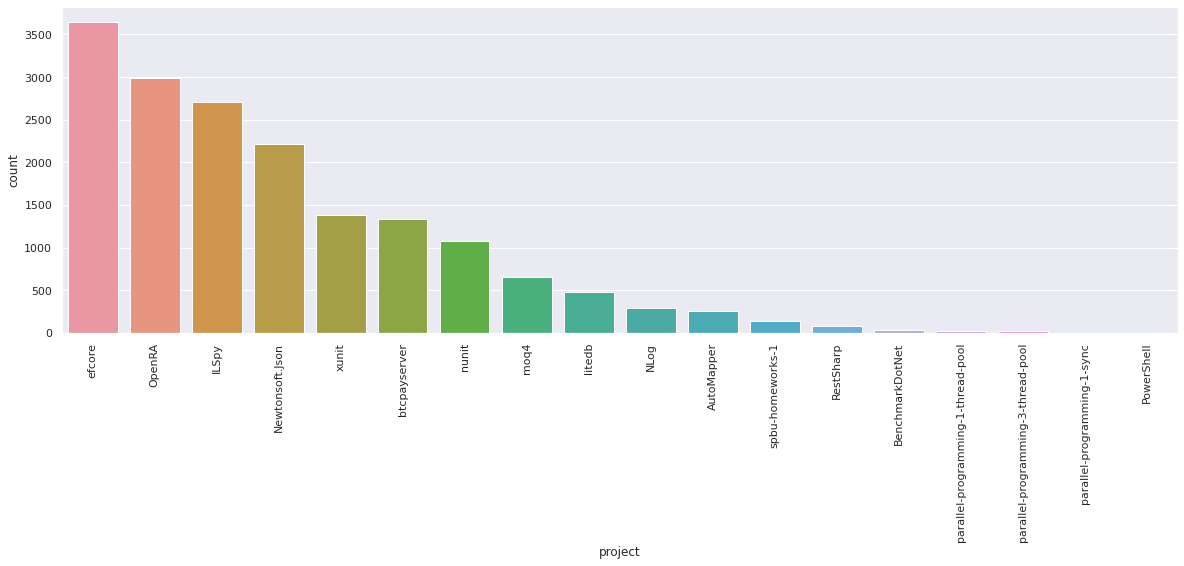

In [46]:
ax = sns.countplot(x="project", data=sonar_df, order = sonar_df['project'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [47]:
sonar_df.groupby(['project', 'level']).count()

message  rule_id  location  \
project                            level                                 
AutoMapper                         note          88       88        88   
                                   warning      167      167       167   
BenchmarkDotNet                    note          18       18        18   
                                   warning       19       19        19   
ILSpy                              note         856      856       856   
                                   warning     1846     1846      1846   
NLog                               note           3        3         3   
                                   warning      292      292       291   
Newtonsoft.Json                    note         250      250       250   
                                   warning     1968     1968      1968   
OpenRA                             warning     2990     2990      2990   
PowerShell                         warning        1        1         1   
RestSharp                          note          33       33        33   
                                   warning       51       51        49   
btcpayserver                       note          84       84        84   
                                   warning     1246     1246      1246   
efcore                             note         226      226       226   
                                   warning     3418     3418      3418   
litedb                             note           9        9         9   
                                   warning      470      470       470   
moq4                               note         204      204       204   
                                   warning      456      456       456   
nunit                              note         206      206       205   
                                   warning      872      872       872   
parallel-programming-1-sync        warning        2        2         2   
parallel-programming-1-thread-pool note          12       12        12   
                                   warning        8        8         8   
parallel-programming-3-thread-pool note           1        1         1   
                                   warning       17       17        17   
spbu-homeworks-1                   note          32       32        32   
                                   warning      106      106       106   
xunit                              note         265      265       265   
                                   warning     1119     1119      1119   

                                            report_name  
project                            level                 
AutoMapper                         note              88  
                                   warning          167  
BenchmarkDotNet                    note              18  
                                   warning           19  
ILSpy                              note             856  
                                   warning         1846  
NLog                               note               3  
                                   warning          292  
Newtonsoft.Json                    note             250  
                                   warning         1968  
OpenRA                             warning         2990  
PowerShell                         warning            1  
RestSharp                          note              33  
                                   warning           51  
btcpayserver                       note              84  
                                   warning         1246  
efcore                             note             226  
                                   warning         3418  
litedb                             note               9  
                                   warning          470  
moq4                               note             204  
                                   warning          456  
nunit                              note             206  
   

In [48]:
sonar_df['rule_id'].value_counts()

S3776     1667
S2699     1461
CS0618    1426
CA1822    1157
S1104     1151
          ... 
CA1820       1
S2222        1
S1764        1
CA2231       1
CS8766       1
Name: rule_id, Length: 264, dtype: int64

In [49]:
roslyn_sonar_df = sonar_df[sonar_df['rule_id'].str.startswith('CS') | sonar_df['rule_id'].str.startswith('CA') | sonar_df['rule_id'].str.startswith('AD')]
roslyn_sonar_df.shape

(3809, 6)

In [50]:
roslyn_sonar_df.head()

,project,message,level,rule_id,location,report_name
22,Newtonsoft.Json,'SerializationBinder' is obsolete: 'Serializat...,warning,CS0618,file:///home/msedlyarskiy/benchmark/projects/N...,Newtonsoft.Json_Src_Newtonsoft.Json_4.sarif
23,Newtonsoft.Json,'BsonWriter' is obsolete: 'BSON reading and wr...,warning,CS0618,file:///home/msedlyarskiy/benchmark/projects/N...,Newtonsoft.Json_Src_Newtonsoft.Json_4.sarif
24,Newtonsoft.Json,Nullability of reference types in type of para...,warning,CS8767,file:///home/msedlyarskiy/benchmark/projects/N...,Newtonsoft.Json_Src_Newtonsoft.Json_4.sarif
25,Newtonsoft.Json,'SerializationBinder' is obsolete: 'Serializat...,warning,CS0618,file:///home/msedlyarskiy/benchmark/projects/N...,Newtonsoft.Json_Src_Newtonsoft.Json_4.sarif
26,Newtonsoft.Json,'SerializationBinder' is obsolete: 'Serializat...,warning,CS0618,file:///home/msedlyarskiy/benchmark/projects/N...,Newtonsoft.Json_Src_Newtonsoft.Json_4.sarif


In [51]:
roslyn_sonar_df['rule_id'].value_counts()

CS0618    1426
CA1822    1157
CA1050     173
CA1825     112
CA1806      91
          ... 
CS8765       1
CS8764       1
CS8002       1
CS8602       1
CS8766       1
Name: rule_id, Length: 86, dtype: int64

In [52]:
sonar_sonar_df = sonar_df[sonar_df['rule_id'].str.startswith('S')]
sonar_sonar_df.shape

(12993, 6)

In [53]:
sonar_sonar_df.head()

,project,message,level,rule_id,location,report_name
0,xunit,"Refactor 'Failures' into a method, properties ...",warning,S2365,file:///home/msedlyarskiy/benchmark/projects/x...,xunit_36.sarif
1,xunit,Refactor this getter so that it actually refer...,warning,S4275,file:///home/msedlyarskiy/benchmark/projects/x...,xunit_36.sarif
2,xunit,Remove the unused private field 'NullableTypeI...,warning,S1144,file:///home/msedlyarskiy/benchmark/projects/x...,xunit_36.sarif
3,xunit,Private classes or records which are not deriv...,warning,S3260,file:///home/msedlyarskiy/benchmark/projects/x...,xunit_36.sarif
4,xunit,A static field in a generic type is not shared...,warning,S2743,file:///home/msedlyarskiy/benchmark/projects/x...,xunit_36.sarif


In [54]:
sonar_sonar_df['rule_id'].value_counts()

S3776    1667
S2699    1461
S1104    1151
S927      695
S3358     432
         ... 
S1862       1
S2225       1
S3904       1
S2290       1
S1163       1
Name: rule_id, Length: 167, dtype: int64

In [55]:
other_sonar_df = sonar_df[~(sonar_df['rule_id'].str.startswith('S')) & ~(sonar_df['rule_id'].str.startswith('CA')) & ~(sonar_df['rule_id'].str.startswith('CS')) & ~(sonar_df['rule_id'].str.startswith('AD'))]
other_sonar_df.shape

(533, 6)

In [56]:
other_sonar_df['rule_id'].value_counts()

EF1001       402
xUnit1033     76
xUnit1004     24
DOC100        11
xUnit1013      9
NUnit2005      4
DOC201         3
DOC101         1
NUnit2003      1
NUnit2002      1
xUnit2000      1
Name: rule_id, dtype: int64

In [57]:
roslyn_sonar_df['project'].value_counts()

Newtonsoft.Json                       1478
ILSpy                                  873
xunit                                  292
btcpayserver                           267
efcore                                 264
nunit                                  218
moq4                                   214
AutoMapper                              88
spbu-homeworks-1                        33
RestSharp                               28
BenchmarkDotNet                         18
NLog                                    17
parallel-programming-1-thread-pool      11
parallel-programming-3-thread-pool       8
Name: project, dtype: int64

In [58]:
sonar_sonar_df['project'].value_counts()

OpenRA                                2990
efcore                                2893
ILSpy                                 1829
xunit                                 1092
btcpayserver                          1062
nunit                                  856
Newtonsoft.Json                        740
litedb                                 470
moq4                                   441
NLog                                   266
AutoMapper                             167
spbu-homeworks-1                       105
RestSharp                               47
BenchmarkDotNet                         19
parallel-programming-3-thread-pool      10
parallel-programming-1-thread-pool       3
parallel-programming-1-sync              2
PowerShell                               1
Name: project, dtype: int64

In [59]:
other_sonar_df['project'].value_counts()

efcore                                487
NLog                                   12
RestSharp                               9
litedb                                  9
parallel-programming-1-thread-pool      6
moq4                                    5
nunit                                   4
btcpayserver                            1
Name: project, dtype: int64

#PVS

In [60]:
pvs_df = pd.read_csv('/content/drive/MyDrive/analyzers/pvs.csv')
pvs_df.drop_duplicates(subset=['rule_id', 'location'], inplace=True)
pvs_df = pvs_df[pvs_df['rule_id'] != 'V3144'] # removed "This file is marked with copyleft license, which requires you to open the derived source code"
pvs_df.shape

(2580, 6)

In [61]:
pvs_df.head()

,project,message,level,rule_id,location,report_name
0,litedb,Checking value of 'entity' for null will alway...,note,V3111,file:///home/msedlyarskiy/benchmark/projects/l...,litedb_LiteDB.sarif
1,litedb,Checking value of 'entity' for null will alway...,note,V3111,file:///home/msedlyarskiy/benchmark/projects/l...,litedb_LiteDB.sarif
2,litedb,Checking value of 'entity' for null will alway...,note,V3111,file:///home/msedlyarskiy/benchmark/projects/l...,litedb_LiteDB.sarif
3,litedb,Checking value of 'entity' for null will alway...,note,V3111,file:///home/msedlyarskiy/benchmark/projects/l...,litedb_LiteDB.sarif
4,litedb,String literal contains potential interpolated...,note,V3138,file:///home/msedlyarskiy/benchmark/projects/l...,litedb_LiteDB.sarif


In [62]:
pvs_df['project'].value_counts()

ILSpy.sarif                           792
btcpayserver                          374
OpenRA.sarif                          342
Newtonsoft.Json                       265
nunit                                 203
NLog                                  163
xunit.sarif                           127
litedb                                110
BenchmarkDotNet.sarif                  82
moq4                                   61
AutoMapper                             38
RestSharp                              16
spbu-homeworks-1                        5
parallel-programming-3-thread-pool      2
Name: project, dtype: int64

In [63]:
pvs_df['rule_id'].value_counts()

V3080    327
V3022    294
V3010    265
V3163    229
V3024    108
        ... 
V3182      1
V3058      1
V3131      1
V3020      1
V3039      1
Name: rule_id, Length: 108, dtype: int64

V3022 -- Expression \<exp\> is always false

V3080 -- Possible null dereference

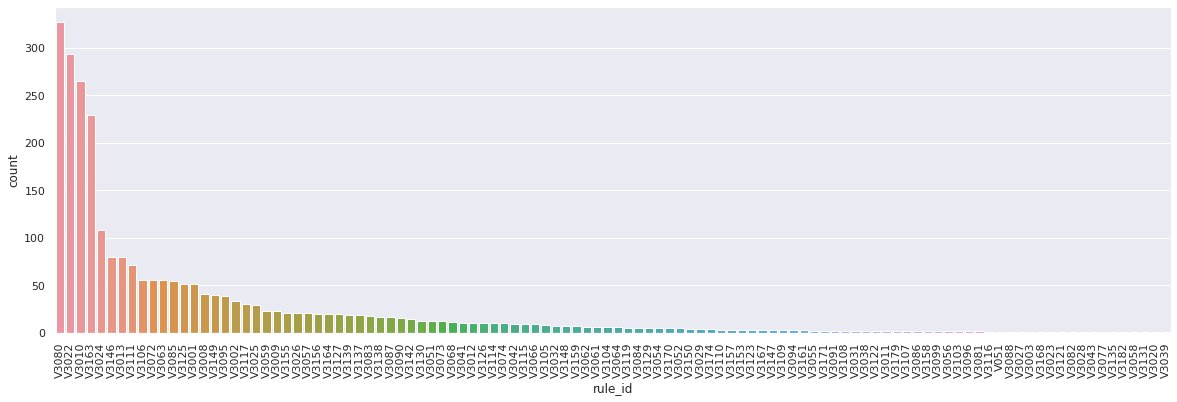

In [64]:
ax = sns.countplot(x="rule_id", data=pvs_df, order = pvs_df['rule_id'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [65]:
pvs_df.groupby(['project', 'level']).count()

message  rule_id  location  \
project                            level                                 
AutoMapper                         error          9        9         9   
                                   note           7        7         7   
                                   warning       22       22        22   
BenchmarkDotNet.sarif              error         14       14        14   
                                   note          45       45        45   
                                   warning       23       23        23   
ILSpy.sarif                        error        223      223       223   
                                   note         312      312       312   
                                   warning      257      257       257   
NLog                               error         49       49        49   
                                   note          72       72        72   
                                   warning       42       42        42   
Newtonsoft.Json                    error        167      167       167   
                                   note          52       52        52   
                                   warning       46       46        46   
OpenRA.sarif                       error         34       34        34   
                                   note         111      111       111   
                                   warning      197      197       197   
RestSharp                          error          2        2         2   
                                   note           9        9         9   
                                   warning        5        5         5   
btcpayserver                       error         61       61        61   
                                   note         131      131       131   
                                   warning      182      182       182   
litedb                             error         21       21        21   
                                   note          49       49        49   
                                   warning       40       40        40   
moq4                               error         14       14        14   
                                   note          20       20        20   
                                   warning       27       27        27   
nunit                              error         41       41        41   
                                   note          83       83        83   
                                   warning       79       79        79   
parallel-programming-3-thread-pool warning        2        2         2   
spbu-homeworks-1                   warning        5        5         5   
xunit.sarif                        error         21       21        21   
                                   note          56       56        56   
                                   warning       50       50        50   

                                            report_name  
project                            level                 
AutoMapper                         error              9  
                                   note               7  
                                   warning           22  
BenchmarkDotNet.sarif              error             14  
                                   note              45  
                                   warning           23  
ILSpy.sarif                        error            223  
                                   note             312  
                                   warning          257  
NLog                               error             49  
                                   note              72  
                                   warning           42  
Newtonsoft.Json                    error            167  
                                   note              52  
                                   warning           46  
OpenRA.sarif                       error             34  
                                   note

In [66]:
pvs_intersting_df = pvs_df[(pvs_df['rule_id'] == "V3022") | (pvs_df['rule_id'] == "V3080") | (pvs_df['rule_id'] == "V3106")]
pvs_intersting_df.groupby(['project', 'rule_id']).count()

message  level  location  report_name
project               rule_id                                       
AutoMapper            V3022          2      2         2            2
                      V3080          1      1         1            1
BenchmarkDotNet.sarif V3022         14     14        14           14
ILSpy.sarif           V3022         98     98        98           98
                      V3080        128    128       128          128
                      V3106         17     17        17           17
NLog                  V3022         34     34        34           34
                      V3080          9      9         9            9
                      V3106          1      1         1            1
Newtonsoft.Json       V3022         30     30        30           30
                      V3080         10     10        10           10
                      V3106         34     34        34           34
OpenRA.sarif          V3022         13     13        13           13
                      V3080         39     39        39           39
                      V3106          2      2         2            2
RestSharp             V3080          1      1         1            1
btcpayserver          V3022         37     37        37           37
                      V3080         99     99        99           99
litedb                V3022         15     15        15           15
                      V3080         19     19        19           19
moq4                  V3022          4      4         4            4
                      V3080          2      2         2            2
nunit                 V3022         28     28        28           28
                      V3080          8      8         8            8
spbu-homeworks-1      V3106          2      2         2            2
xunit.sarif           V3022         19     19        19           19
                      V3080         11     11        11           11